In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

sns.set_style("dark")

%matplotlib inline

Index(['age', 'income', 'tenure', 'district', 'profit_99', 'online_99',
       'billpay_99', 'profit_00', 'online_00', 'billpay_00', 'profit_99_bins'],
      dtype='object')

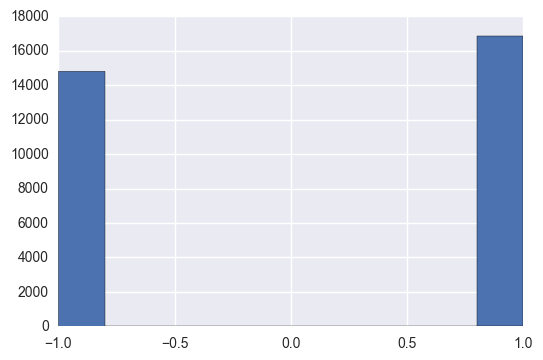

In [22]:
pil = pd.read_csv('qt-1.csv').set_index('id')
pil['profit_99_bins'] = pd.cut(pil.profit_99, bins=[-np.inf, 0, np.inf], labels=[-1, 1])
pil['profit_99_bins'].hist()
pil.columns

In [3]:
pil.profit_99_bins.value_counts()

 1    16832
-1    14802
Name: profit_99_bins, dtype: int64

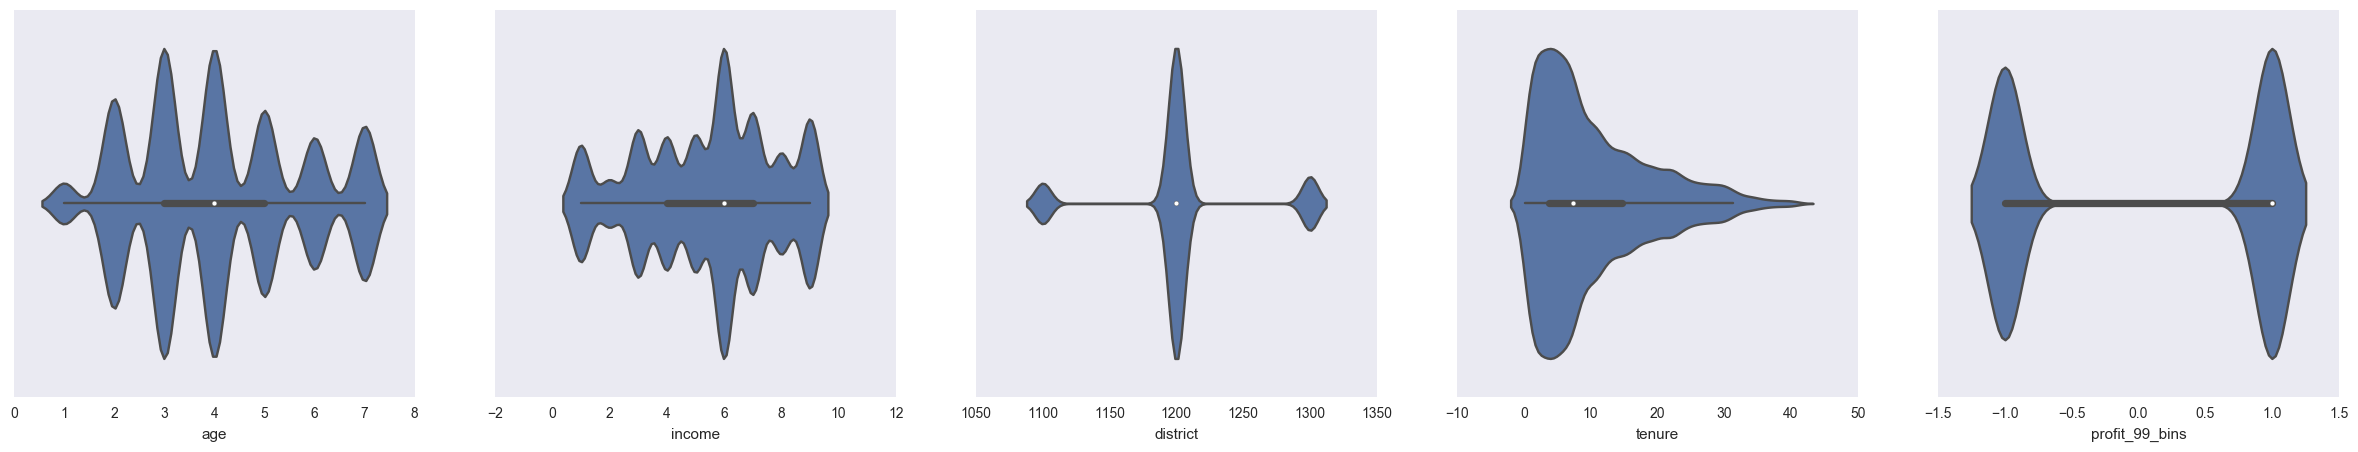

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=[30,5])
sns.violinplot(x='age', data=pil,hue='profit_99_bins', ax=axes[0])
sns.violinplot(x='income', data=pil, ax=axes[1])
sns.violinplot(x='district', data=pil, ax=axes[2])
sns.violinplot(x='tenure', data=pil, ax=axes[3])
sns.violinplot(x='profit_99_bins', data=pil, ax=axes[4])

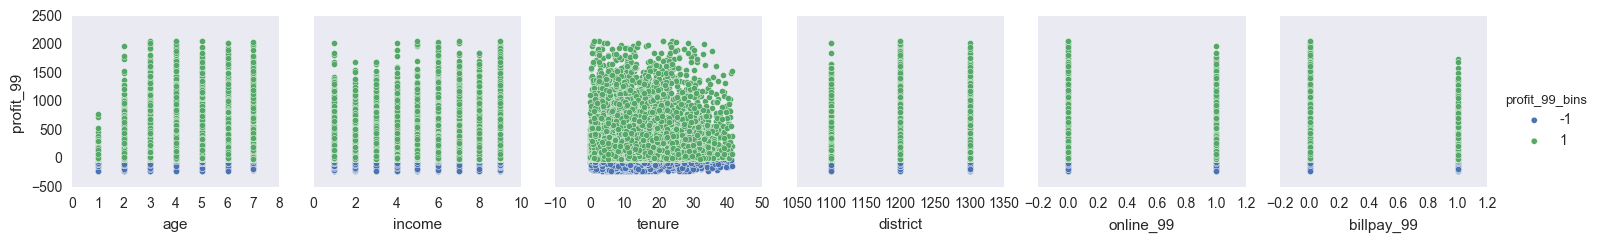

In [5]:
sns.pairplot(data=pil,hue='profit_99_bins', y_vars=['profit_99'], x_vars=['age', 'income', 'tenure', 'district', 'online_99','billpay_99',])

online_99
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: profit_99_bins, dtype: object

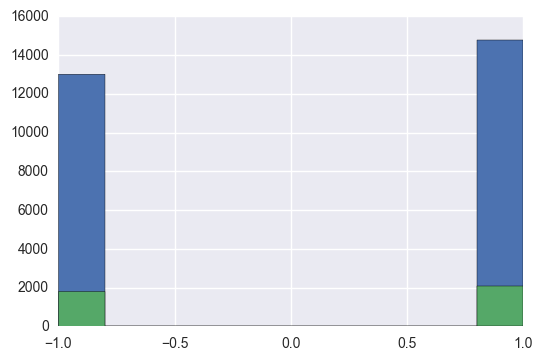

In [6]:
pil.groupby('online_99')['profit_99_bins'].hist()

In [7]:
profit = pil.profit_99
conf_int = stats.norm.interval(0.95, loc=profit.mean(), scale=profit.std(ddof=1)/np.sqrt(len(profit)))
print('Average customer profitability with 95% confidence level in 1999 ')
print('Average customer profitability: {0}'.format(profit.mean()))
print('Confidence Interval: min: {0}, max: {1}'.format(conf_int[0], conf_int[1]))
print('*'*100)

profit = pil.profit_00
conf_int = stats.norm.interval(0.95, loc=profit.mean(), scale=profit.std(ddof=1)/np.sqrt(len(profit)))
print('Average customer profitability with 95% confidence level in 2000 ')
print('Average customer profitability: {0}'.format(profit.mean()))
print('Confidence Interval: min: {0}, max: {1}'.format(conf_int[0], conf_int[1]))

Average customer profitability with 95% confidence level in 1999 
Average customer profitability: 111.50268698236076
Confidence Interval: min: 108.49606998631779, max: 114.50930397840372
****************************************************************************************************
Average customer profitability with 95% confidence level in 2000 
Average customer profitability: 144.8270192453402
Confidence Interval: min: 140.5293818675143, max: 149.12465662316612


In [8]:
import statsmodels.api as sm
group= pil.online_99
group = sm.add_constant(group)
model2a = sm.OLS(pil.profit_99,group)
results2a = model2a.fit()
print(results2a.summary())

                            OLS Regression Results                            
Dep. Variable:              profit_99   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.572
Date:                Tue, 17 Jan 2017   Prob (F-statistic):              0.210
Time:                        13:38:00   Log-Likelihood:            -2.2232e+05
No. Observations:               31634   AIC:                         4.446e+05
Df Residuals:                   31632   BIC:                         4.447e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        110.7862      1.637     67.678      0.0

In [9]:
import statsmodels.api as sm
group= pil.billpay_99
group = sm.add_constant(group)
model2a = sm.OLS(pil.profit_99,group)
results2a = model2a.fit()
print(results2a.summary())

                            OLS Regression Results                            
Dep. Variable:              profit_99   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     50.86
Date:                Tue, 17 Jan 2017   Prob (F-statistic):           1.01e-12
Time:                        13:38:00   Log-Likelihood:            -2.2229e+05
No. Observations:               31634   AIC:                         4.446e+05
Df Residuals:                   31632   BIC:                         4.446e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        110.0785      1.546     71.213      0.0

In [10]:
pil_age = pil.dropna(subset=['age', 'income', 'tenure', 'online_99'])
group= pil_age[['age',  'online_99']]
group = sm.add_constant(group)
model2b = sm.OLS(pil_age.profit_99, group)
results2b = model2b.fit()
print(results2b.summary())

                            OLS Regression Results                            
Dep. Variable:              profit_99   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     247.8
Date:                Tue, 17 Jan 2017   Prob (F-statistic):          3.50e-107
Time:                        13:38:00   Log-Likelihood:            -1.6090e+05
No. Observations:               22812   AIC:                         3.218e+05
Df Residuals:                   22809   BIC:                         3.218e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         19.7594      5.194      3.804      0.0

In [11]:
pil_na = pil[['age', 'income', 'tenure', 'district', 'profit_99_bins', 'online_99', 'billpay_99']].dropna()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pil_na.drop(['profit_99_bins'], axis=1), pil_na.profit_99_bins, test_size=0.2)

In [12]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)
print('Train Score for {0}: {1}'.format('kernel', classifier.score(X_train, y_train)))
print('Test Score for {0}: {1}'.format('kernel', classifier.score(X_test, y_test)))    

Train Score for kernel: 0.5694010630719492
Test Score for kernel: 0.5485426254657024


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
models = [SVC(kernel='rbf', random_state=0), SVC(kernel='linear', random_state=0), XGBClassifier(), LogisticRegression()]
model_names = ['SVC_rbf', 'SVC_linear', 'xgboost', 'Logistic Regression']
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    print ('The accurancy of ' + model_names[i] + ' is ' + str(accuracy_score(y_test, model.predict(X_test))) )


The accurancy of SVC_rbf is 0.580758273066
The accurancy of SVC_linear is 0.586017970633
The accurancy of xgboost is 0.59083936007
The accurancy of Logistic Regression is 0.584264738111


[ 0.14098836  0.21802326  0.46511629  0.11918604  0.01017442  0.04651163]


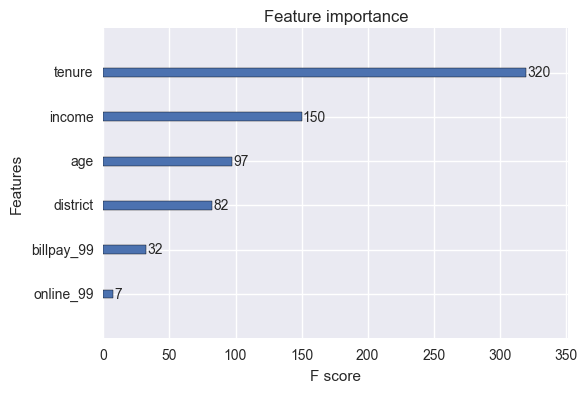

In [14]:
ax = xgboost.plot_importance(models[2])
print(models[2].feature_importances_)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)
print('Train Score for {0}: {1}'.format('kernel', classifier.score(X_train, y_train)))
print('Test Score for {0}: {1}'.format('kernel', classifier.score(X_test, y_test))) 

Train Score for kernel: 0.7371362814400789
Test Score for kernel: 0.5088757396449705


In [16]:
from sklearn.ensemble import BaggingClassifier
classifier = BaggingClassifier()
classifier.fit(X_train, y_train)
print('Train Score for {0}: {1}'.format('kernel', classifier.score(X_train, y_train)))
print('Test Score for {0}: {1}'.format('kernel', classifier.score(X_test, y_test))) 

Train Score for kernel: 0.8665680311249931
Test Score for kernel: 0.5220249835634451


In [17]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)
print('Train Score for {0}: {1}'.format('kernel', classifier.score(X_train, y_train)))
print('Test Score for {0}: {1}'.format('kernel', classifier.score(X_test, y_test))) 

Train Score for kernel: 0.6149926023343745
Test Score for kernel: 0.5899627438088977


In [18]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier()
classifier.fit(X_train, y_train)
print('Train Score for {0}: {1}'.format('kernel', classifier.score(X_train, y_train)))
print('Test Score for {0}: {1}'.format('kernel', classifier.score(X_test, y_test))) 

Train Score for kernel: 0.8837744533947065
Test Score for kernel: 0.5299145299145299


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)
print('Train Score for {0}: {1}'.format('kernel', classifier.score(X_train, y_train)))
print('Test Score for {0}: {1}'.format('kernel', classifier.score(X_test, y_test))) 

Train Score for kernel: 0.6194312017096827
Test Score for kernel: 0.589086127547666


In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
print('Train Score for {0}: {1}'.format('kernel', classifier.score(X_train, y_train)))
print('Test Score for {0}: {1}'.format('kernel', classifier.score(X_test, y_test))) 

Train Score for kernel: 0.8621294317496849
Test Score for kernel: 0.5356125356125356
